In [3]:
import pandas as pd##

In [4]:
df = pd.read_csv('D:/Courses/Client_Projects/Sir_Malik/Used_Car_Sales_Pakwheels/Data/pakwheels_cleaned.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...


In [5]:
df.assembly.unique()

array(['Imported Cars', 'Imported'], dtype=object)

In [6]:
df.isna().sum()

Unnamed: 0.1       0
Unnamed: 0         0
ad_url             0
title              0
location           0
model_year         0
price              0
mileage            0
engine_type        0
transmission       0
registered_in      0
color              0
assembly           0
engine_capacity    0
body_type          0
ad_last_updated    0
car_features       0
description        0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ad_url', 'title', 'location',
       'model_year', 'price', 'mileage', 'engine_type', 'transmission',
       'registered_in', 'color', 'assembly', 'engine_capacity', 'body_type',
       'ad_last_updated', 'car_features', 'description'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'ad_url','description','ad_last_updated','assembly'],axis=1)
df.head()

,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,engine_capacity,body_type,car_features
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,1800 cc,Sedan,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...
1,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,800 cc,Hatchback,AM/FM Radio\nCD Player\nImmobilizer Key
2,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,1500 cc,Sedan,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...
3,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,2700 cc,SUV,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...
4,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,796 cc,Hatchback,AM/FM Radio\nCD Player\nImmobilizer Key


In [9]:
import numpy as np
import pandas as pd

def clean_data(df):
    """
    Cleans the dataset:
    - Extracts brand/car/car_desc from 'title'
    - Parses and normalizes 'price'
    - Cleans 'location', 'mileage', 'engine_capacity'
    - One-hot encodes 'car_features'
    """
    
    # --- TITLE EXTRACTION ---
    df['brand'] = df['title'].str.split(' ').str[0]
    df['car'] = df['title'].str.split(' ').str[1]
    df['car_desc'] = df['title'].str.split(' ').apply(lambda x: ' '.join(x[2:]) if len(x) > 2 else '')
    df = df.drop(columns=['title'])

    # --- PRICE PARSING ---
    def parse_price(price_str):
        try:
            if not isinstance(price_str, str) or 'call' in price_str.lower():
                return np.nan
            parts = price_str.strip().split()
            if len(parts) >= 3:
                value = float(parts[1].replace(',', ''))
                unit = parts[2].lower()
                if 'lac' in unit:
                    return int(value * 1e5)
                elif 'crore' in unit:
                    return int(value * 1e7)
            return np.nan
        except Exception:
            return np.nan

    df['price'] = df['price'].apply(parse_price)

    # Fill NaNs (like "Call for price") with median price
    median_price = df['price'].median()
    df['price'] = df['price'].fillna(median_price)

    # --- LOCATION FIX ---
    df['location'] = df['location'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x.split(' ')[1] if len(x.split(' ')) > 1 else x)

    # --- MILEAGE FIX ---
    def clean_mileage(mileage_str):
        try:
            if isinstance(mileage_str, str):
                value = mileage_str.strip().lower().replace('km', '').replace(',', '').strip()
                return int(value)
            return np.nan
        except:
            return np.nan

    df['mileage'] = df['mileage'].apply(clean_mileage)

    # --- ENGINE CAPACITY ---
    df['engine_capacity'] = df['engine_capacity'].str.extract(r'(\d+)').astype(float)

    # --- ONE-HOT ENCODING FOR car_features ---
    def one_hot_encode_features(df, feature_col='car_features'):
        df[feature_col] = df[feature_col].fillna("").apply(lambda x: [f.strip() for f in x.split('\n') if f.strip()])
        all_features = set(f for features in df[feature_col] for f in features)
        for feature in all_features:
            df[feature] = df[feature_col].apply(lambda x: int(feature in x))
        return df.drop(columns=[feature_col])

    df = one_hot_encode_features(df, feature_col='car_features')

    return df


# Example usage:
df_clean =clean_data(df.copy())



In [10]:
df_clean.isna().sum()

location                   0
model_year                 0
price                      0
mileage                    0
engine_type                0
transmission               0
registered_in              0
color                      0
engine_capacity            0
body_type                  0
brand                      0
car                        0
car_desc                   0
Keyless Entry              0
Rear Camera                0
ABS                        0
Sun Roof                   0
Navigation System          0
Steering Switches          0
USB and Auxillary Cable    0
AM/FM Radio                0
Alloy Rims                 0
DVD Player                 0
Heated Seats               0
Power Mirrors              0
Immobilizer Key            0
Air Conditioning           0
Cruise Control             0
Cassette Player            0
CoolBox                    0
Power Windows              0
Front Speakers             0
Rear Speakers              0
Rear Seat Entertainment    0
Power Steering

In [15]:
# Define your categorical columns (edit if needed)
categorical_columns = [
    'location', 'engine_type', 'transmission', 'registered_in',
    'color', 'body_type', 'brand', 'car'
]

# Dictionary to hold all mappings
mappings = {}

# Generate mappings and write them directly to the file
with open("label_mappings.py", "w", encoding="utf-8") as f:
    for col in categorical_columns:
        unique_vals = df_clean[col].dropna().unique()
        sorted_vals = sorted(unique_vals)
        mapping = {val: i for i, val in enumerate(sorted_vals)}
        reverse_mapping = {i: val for val, i in mapping.items()}
        
        # Save to the main dictionary for reuse if needed
        mappings[col] = mapping

        # Write to the file
        f.write(f"{col}_map = {{\n")
        for k, v in mapping.items():
            f.write(f"    {repr(k)}: {v},\n")
        f.write("}\n\n")
        
        f.write(f"reverse_{col}_map = "+"{v: k for k, v in "+f"{col}_map.items()}}\n\n")

print("✅ Mappings and reverse mappings written to label_mappings.py")


✅ Mappings and reverse mappings written to label_mappings.py


In [12]:
df.columns

Index(['title', 'location', 'model_year', 'price', 'mileage', 'engine_type',
       'transmission', 'registered_in', 'color', 'engine_capacity',
       'body_type', 'car_features'],
      dtype='object')

In [227]:
df.price.unique()

array(['PKR 16.5 lacs', 'PKR 7 lacs', 'PKR 7.6 lacs', ...,
       'PKR 16.02 lacs', 'PKR 44.39 lacs', 'PKR 5.75 crore'],
      shape=(2101,), dtype=object)

In [228]:
nan_row_indices_df = df[df.isna().any(axis=1)].index
print(nan_row_indices_df)

Index([], dtype='int64')


In [229]:
df.body_type.unique()

array(['Sedan', 'Hatchback', 'SUV', 'Mini Van', 'MPV', 'Double Cabin',
       'Compact sedan', 'Pick Up', 'Van', 'Micro Van', 'High Roof',
       'Compact SUV', 'Station Wagon', 'Crossover', 'Coupe',
       'Subcompact hatchback', 'Convertible', 'Truck',
       'Off-Road Vehicles', 'Single Cabin', 'Mini Vehicles',
       'Compact hatchback'], dtype=object)

In [230]:
le_cols=['location','registered_in','body_type','car_desc','color','brand','car']
one_hot_cols = ['engine_type','transmission','assembly','car_features']

In [231]:
df.isna().sum()

title              0
location           0
model_year         0
price              0
mileage            0
engine_type        0
transmission       0
registered_in      0
color              0
engine_capacity    0
body_type          0
car_features       0
dtype: int64

In [232]:
df_clean.car_desc

0        VTi Oriel Prosmatec 1.8 i-VTEC 2007
1                            VX Euro II 2012
2                                    EX 1995
3                              2.7 VVTi 2013
4                            VX Euro II 2015
                        ...                 
75660                          G SA III 2018
75661              Oriel 1.8 i-VTEC CVT 2017
75662            GLi Automatic 1.6 VVTi 2011
75663                           DLX 1.3 2013
75664                        XE Limited 1996
Name: car_desc, Length: 75665, dtype: object

In [233]:
import re
def remove_year(text):
    return re.sub(r'\b(19|20)\d{2}\b', '', text)

# Apply year removal and clean up whitespace
df_clean['car_desc'] = df_clean['car_desc'].fillna('').apply(remove_year).str.strip()

In [234]:
df_clean.columns

Index(['location', 'model_year', 'price', 'mileage', 'engine_type',
       'transmission', 'registered_in', 'color', 'engine_capacity',
       'body_type', 'brand', 'car', 'car_desc', 'Air Conditioning',
       'Power Steering', 'Front Camera', 'Rear Speakers', 'Rear Camera',
       'DVD Player', 'USB and Auxillary Cable', 'CD Player', 'Cassette Player',
       'Rear AC Vents', 'Power Mirrors', 'Keyless Entry', 'Cruise Control',
       'Heated Seats', 'Immobilizer Key', 'Power Locks',
       'Rear Seat Entertainment', 'Steering Switches', 'CoolBox', 'ABS',
       'Front Speakers', 'Air Bags', 'Alloy Rims', 'Navigation System',
       'Sun Roof', 'Climate Control', 'AM/FM Radio', 'Power Windows'],
      dtype='object')

In [235]:
def apply_dtypes(df):
    numeric_cols = ['model_year', 'price', 'mileage', 'engine_capacity']
    categorical_cols = [
        'location', 'engine_type', 'transmission', 'registered_in', 'color',
        'assembly', 'body_type', 'brand', 'car'
    ]
    feature_cols = [
        'Air Conditioning', 'Power Steering', 'Front Camera', 'Rear Speakers',
        'Rear Camera', 'DVD Player', 'USB and Auxillary Cable', 'CD Player',
        'Cassette Player', 'Rear AC Vents', 'Power Mirrors', 'Keyless Entry',
        'Cruise Control', 'Heated Seats', 'Immobilizer Key', 'Power Locks',
        'Rear Seat Entertainment', 'Steering Switches', 'CoolBox', 'ABS',
        'Front Speakers', 'Air Bags', 'Alloy Rims', 'Navigation System',
        'Sun Roof', 'Climate Control', 'AM/FM Radio', 'Power Windows'
    ]
    # Convert numeric columns
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Convert categorical columns
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')
    # Convert feature columns to binary/int8
    for col in feature_cols:
        if col in df.columns:
            df[col] = df[col].astype('int8')
    return df

df1 = apply_dtypes(df_clean)
df1.head()
df1.iloc[59]

location                   Hyderabad Sindh
model_year                          2013.0
price                           15000000.0
mileage                             104000
engine_type                         Petrol
transmission                     Automatic
registered_in                      Karachi
color                                Black
engine_capacity                     2700.0
body_type                              SUV
brand                               Toyota
car                                  Prado
car_desc                            TX 2.7
Air Conditioning                         1
Power Steering                           1
Front Camera                             0
Rear Speakers                            0
Rear Camera                              0
DVD Player                               1
USB and Auxillary Cable                  0
CD Player                                1
Cassette Player                          0
Rear AC Vents                            0
Power Mirro

In [236]:
df1.isna().sum()

location                   0
model_year                 0
price                      0
mileage                    0
engine_type                0
transmission               0
registered_in              0
color                      0
engine_capacity            0
body_type                  0
brand                      0
car                        0
car_desc                   0
Air Conditioning           0
Power Steering             0
Front Camera               0
Rear Speakers              0
Rear Camera                0
DVD Player                 0
USB and Auxillary Cable    0
CD Player                  0
Cassette Player            0
Rear AC Vents              0
Power Mirrors              0
Keyless Entry              0
Cruise Control             0
Heated Seats               0
Immobilizer Key            0
Power Locks                0
Rear Seat Entertainment    0
Steering Switches          0
CoolBox                    0
ABS                        0
Front Speakers             0
Air Bags      

In [237]:
df1

,location,model_year,price,mileage,engine_type,transmission,registered_in,color,engine_capacity,body_type,...,CoolBox,ABS,Front Speakers,Air Bags,Alloy Rims,Navigation System,Sun Roof,Climate Control,AM/FM Radio,Power Windows
0,Islamabad,2007.0,1650000.0,100000,Petrol,Automatic,Lahore,Grey,1800.0,Sedan,...,0,1,0,1,1,0,1,0,1,1
1,Faisalabad Punjab,2012.0,700000.0,100000,Petrol,Manual,Faisalabad,Grey,800.0,Hatchback,...,0,0,0,0,0,0,0,0,1,0
2,Rawalpindi Punjab,1995.0,760000.0,999,Petrol,Manual,Lahore,Black,1500.0,Sedan,...,0,0,0,0,1,0,0,0,1,1
3,Chakwal Punjab,2013.0,7000000.0,94000,Petrol,Automatic,Lahore,Black,2700.0,SUV,...,0,1,0,1,1,1,0,0,1,1
4,Muzaffar,2015.0,800000.0,86000,Petrol,Manual,Multan,Grey,796.0,Hatchback,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75660,Karachi Sindh,2018.0,3000000.0,65000,Petrol,Automatic,Sindh,White,660.0,Hatchback,...,0,1,0,1,1,0,0,0,0,1
75661,Faisalabad Punjab,2017.0,3750000.0,114000,Petrol,Automatic,Islamabad,Silver,1800.0,Sedan,...,0,1,0,1,1,0,1,0,1,1
75662,Lahore,2011.0,2235000.0,152000,Petrol,Automatic,Lahore,Silver,1600.0,Sedan,...,0,1,0,0,0,0,0,0,1,1
75663,Karachi Sindh,2013.0,1550000.0,104000,Petrol,Manual,Karachi,Silver,1300.0,Hatchback,...,0,1,0,0,1,0,0,0,1,1


In [238]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder

def label_encode_categoricals(df, categorical_cols, save_json_path="categorical_values_for_chatbot.json"):
    """
    Label-encodes categorical columns and stores their label mappings for chatbot use.
    """
    label_encoders = {}
    cat_value_dict = {}

    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = df[col].astype(str)  # Ensure all values are strings
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        cat_value_dict[col] = le.classes_.tolist()

    # Save original category mappings
    with open(save_json_path, "w") as f:
        json.dump(cat_value_dict, f, indent=4)

    return df, label_encoders

# === Usage Example ===
# df = pd.read_csv("your_data.csv")
categorical_cols = [
    'location', 'engine_type', 'transmission', 'registered_in',
    'color','body_type', 'brand', 'car',
    'car_desc'
]
df, label_encoders = label_encode_categoricals(df1, categorical_cols)


In [239]:
df

,location,model_year,price,mileage,engine_type,transmission,registered_in,color,engine_capacity,body_type,...,CoolBox,ABS,Front Speakers,Air Bags,Alloy Rims,Navigation System,Sun Roof,Climate Control,AM/FM Radio,Power Windows
0,124,2007.0,1650000.0,100000,2,0,65,8,1800.0,16,...,0,1,0,1,1,0,1,0,1,1
1,78,2012.0,700000.0,100000,2,1,30,8,800.0,7,...,0,0,0,0,0,0,0,0,1,0
2,295,1995.0,760000.0,999,2,1,65,1,1500.0,16,...,0,0,0,0,1,0,0,0,1,1
3,39,2013.0,7000000.0,94000,2,0,65,1,2700.0,15,...,0,1,0,1,1,1,0,0,1,1
4,244,2015.0,800000.0,86000,2,1,79,8,796.0,7,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75660,156,2018.0,3000000.0,65000,2,0,112,20,660.0,7,...,0,1,0,1,1,0,0,0,0,1
75661,78,2017.0,3750000.0,114000,2,0,46,17,1800.0,16,...,0,1,0,1,1,0,1,0,1,1
75662,192,2011.0,2235000.0,152000,2,0,65,17,1600.0,16,...,0,1,0,0,0,0,0,0,1,1
75663,156,2013.0,1550000.0,104000,2,1,55,17,1300.0,7,...,0,1,0,0,1,0,0,0,1,1


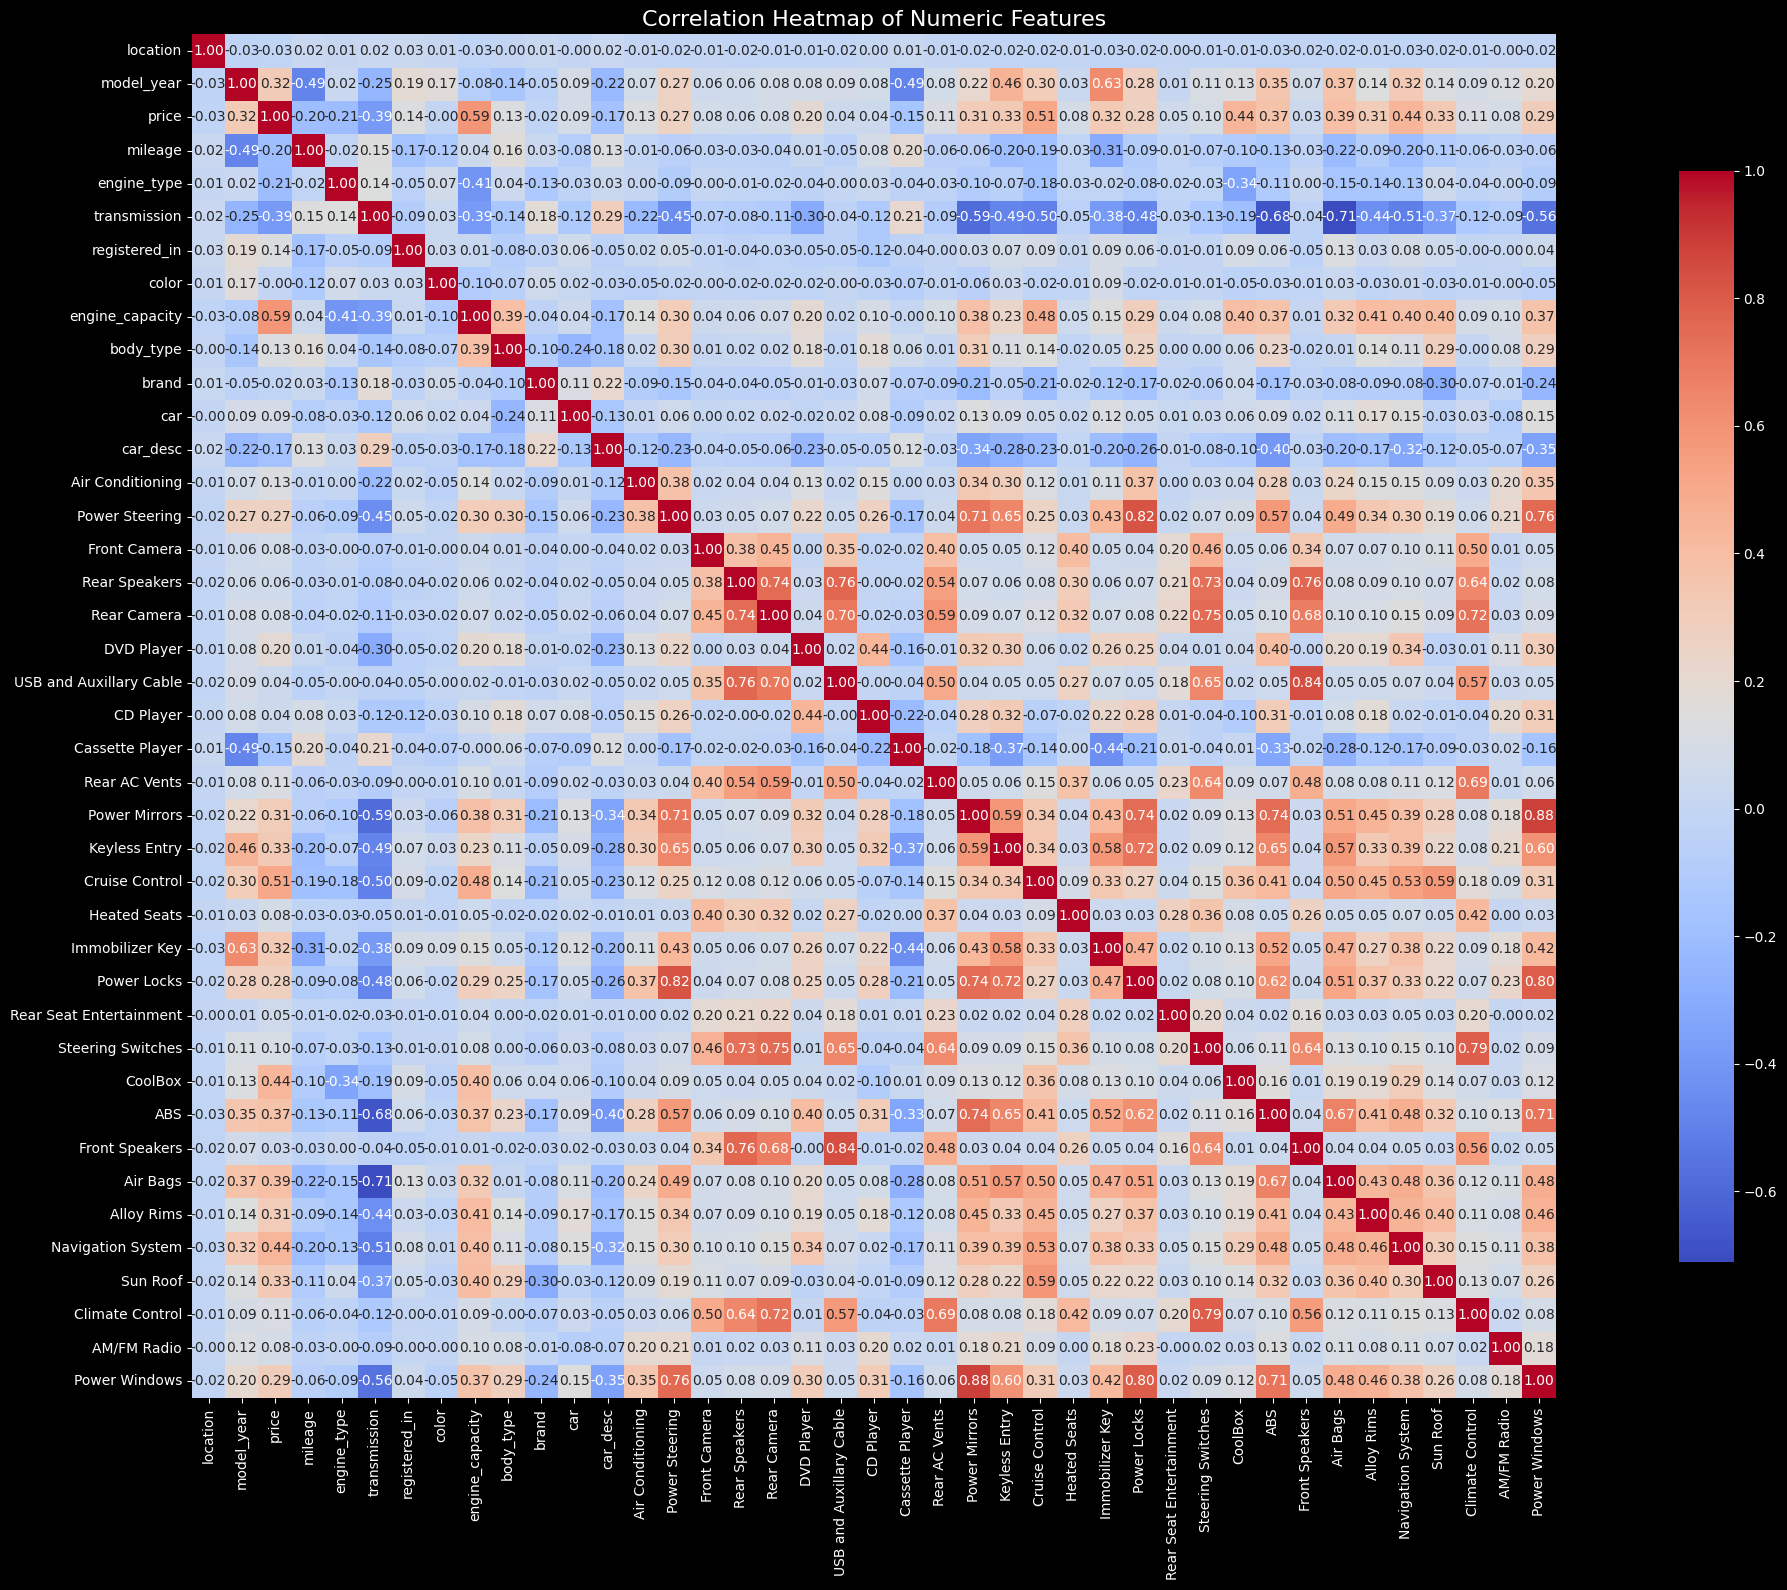

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all relevant columns are numeric (this includes model_year, price, mileage, engine_capacity, etc.)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [241]:
# Correlation with price only
price_corr = df.corr()['price'].sort_values(ascending=False)

print(price_corr)


price                      1.000000
engine_capacity            0.589437
Cruise Control             0.508756
CoolBox                    0.441981
Navigation System          0.440308
Air Bags                   0.389002
ABS                        0.369554
Keyless Entry              0.328524
Sun Roof                   0.325700
Immobilizer Key            0.319569
model_year                 0.316203
Alloy Rims                 0.310872
Power Mirrors              0.309872
Power Windows              0.293125
Power Locks                0.275904
Power Steering             0.266685
DVD Player                 0.196712
registered_in              0.136538
Air Conditioning           0.126656
body_type                  0.125619
Rear AC Vents              0.111900
Climate Control            0.111554
Steering Switches          0.103137
car                        0.089792
AM/FM Radio                0.084011
Rear Camera                0.081562
Heated Seats               0.081001
Front Camera               0

In [242]:
df.columns

Index(['location', 'model_year', 'price', 'mileage', 'engine_type',
       'transmission', 'registered_in', 'color', 'engine_capacity',
       'body_type', 'brand', 'car', 'car_desc', 'Air Conditioning',
       'Power Steering', 'Front Camera', 'Rear Speakers', 'Rear Camera',
       'DVD Player', 'USB and Auxillary Cable', 'CD Player', 'Cassette Player',
       'Rear AC Vents', 'Power Mirrors', 'Keyless Entry', 'Cruise Control',
       'Heated Seats', 'Immobilizer Key', 'Power Locks',
       'Rear Seat Entertainment', 'Steering Switches', 'CoolBox', 'ABS',
       'Front Speakers', 'Air Bags', 'Alloy Rims', 'Navigation System',
       'Sun Roof', 'Climate Control', 'AM/FM Radio', 'Power Windows'],
      dtype='object')

In [273]:
df.to_csv('D:/Courses/Client_Projects/Sir_Malik/Used_Car_Sales_Pakwheels/Data/Final_Cleaned.csv')

In [274]:
df.columns

Index(['location', 'model_year', 'price', 'mileage', 'engine_type',
       'transmission', 'registered_in', 'color', 'engine_capacity',
       'body_type', 'brand', 'car', 'car_desc', 'Air Conditioning',
       'Power Steering', 'Front Camera', 'Rear Speakers', 'Rear Camera',
       'DVD Player', 'USB and Auxillary Cable', 'CD Player', 'Cassette Player',
       'Rear AC Vents', 'Power Mirrors', 'Keyless Entry', 'Cruise Control',
       'Heated Seats', 'Immobilizer Key', 'Power Locks',
       'Rear Seat Entertainment', 'Steering Switches', 'CoolBox', 'ABS',
       'Front Speakers', 'Air Bags', 'Alloy Rims', 'Navigation System',
       'Sun Roof', 'Climate Control', 'AM/FM Radio', 'Power Windows'],
      dtype='object')